In [1]:
import os, shutil
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image

C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\ten

In [2]:
data_normal_dir = '/Users/akams/Documents/Flatiron/Phase_4_project/phase_4_project/CellData/chest_xray/NORMAL'
data_pneumonia_dir = '/Users/akams/Documents/Flatiron/Phase_4_project/phase_4_project/CellData/chest_xray/PNEUMONIA'
new_dir = '/Users/akams/Documents/Flatiron/Phase_4_project/phase_4_project/CellData/chest_xray/split/'

In [3]:
normal_imgs = [x for x in os.listdir(data_normal_dir) if x.endswith('.jpeg')]

In [4]:
pneumonia_imgs = [x for x in os.listdir(data_pneumonia_dir) if x.endswith('.jpeg')]

In [5]:
# os.mkdir(new_dir)

In [6]:
train_folder = os.path.join(new_dir, 'train')
train_normal = os.path.join(train_folder, 'normal')
train_pneumonia = os.path.join(train_folder, 'pneumonia')

test_folder = os.path.join(new_dir, 'test')
test_normal = os.path.join(test_folder, 'normal')
test_pneumonia = os.path.join(test_folder, 'pneumonia')

val_folder = os.path.join(new_dir, 'validation')
val_normal = os.path.join(val_folder, 'normal')
val_pneumonia = os.path.join(val_folder, 'pneumonia')

In [7]:
train_normal

'/Users/akams/Documents/Flatiron/Phase_4_project/phase_4_project/CellData/chest_xray/split/train\\normal'

In [8]:
# os.mkdir(train_folder)
# os.mkdir(train_normal)
# os.mkdir(train_pneumonia)

# os.mkdir(test_folder)
# os.mkdir(test_normal)
# os.mkdir(test_pneumonia)

# os.mkdir(val_folder)
# os.mkdir(val_normal)
# os.mkdir(val_pneumonia)

**putting the images in their respective folders**

**NORMAL**

In [9]:
# train normal
imgs = normal_imgs[:1109]
for img in imgs:
    origin = os.path.join(data_normal_dir, img)
    destination = os.path.join(train_normal, img)
    shutil.copyfile(origin, destination)

In [10]:
# validation normal
imgs = normal_imgs[1109:1425]
for img in imgs:
    origin = os.path.join(data_normal_dir, img)
    destination = os.path.join(val_normal, img)
    shutil.copyfile(origin, destination)

In [11]:
# test normal
imgs = normal_imgs[1425:1584]
for img in imgs:
    origin = os.path.join(data_normal_dir, img)
    destination = os.path.join(test_normal, img)
    shutil.copyfile(origin, destination)

**PNEUMONIA**

In [12]:
# train pneumonia
imgs = pneumonia_imgs[:2992]
for img in imgs:
    origin = os.path.join(data_pneumonia_dir, img)
    destination = os.path.join(train_pneumonia, img)
    shutil.copyfile(origin, destination)

In [13]:
# validation pneumonia
imgs = pneumonia_imgs[2992:3846]
for img in imgs:
    origin = os.path.join(data_pneumonia_dir, img)
    destination = os.path.join(val_pneumonia, img)
    shutil.copyfile(origin, destination)

In [14]:
# test pneumonia
imgs = pneumonia_imgs[3846:4274]
for img in imgs:
    origin = os.path.join(data_pneumonia_dir, img)
    destination = os.path.join(test_pneumonia, img)
    shutil.copyfile(origin, destination)

# EDA

In [15]:
# randomly select 3 of each
select_norm = np.random.choice(normal_imgs, 5, replace = False)
select_pneu = np.random.choice(pneumonia_imgs, 5, replace = False)
print(select_norm)
print(select_pneu)

['NORMAL-7323530-0002.jpeg' 'NORMAL-4184691-0001.jpeg'
 'NORMAL-1513368-0001.jpeg' 'NORMAL-7964343-0001.jpeg'
 'NORMAL-1314288-0001.jpeg']
['VIRUS-7630183-0009.jpeg' 'BACTERIA-3345721-0001.jpeg'
 'BACTERIA-9827460-0001.jpeg' 'BACTERIA-5250831-0004.jpeg'
 'BACTERIA-5882940-0003.jpeg']


Looks like there are 2 types of Pneumonia infections: **Bacterial** and **Viral**.

In [16]:
normal_size = len(normal_imgs)/(len(normal_imgs)+len(pneumonia_imgs))
pneumo_size = len(pneumonia_imgs)/(len(normal_imgs)+len(pneumonia_imgs))
print(len(normal_imgs))
print(len(pneumonia_imgs))
print(normal_size)
print(pneumo_size)

1349
3883
0.25783639143730885
0.7421636085626911


Text(0, 0.5, 'Frequency')

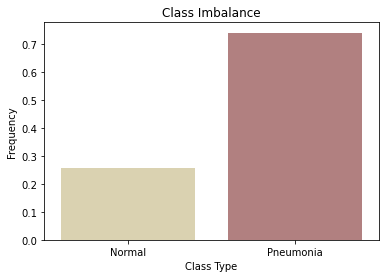

In [17]:
ax = sns.barplot(x = ['Normal', 'Pneumonia'],
                 y = [normal_size, pneumo_size], palette = 'pink_r');
ax.set_title("Class Imbalance");
ax.set_xlabel('Class Type')
ax.set_ylabel('Frequency')
# plt.savefig("normal_pnuemo_classimbalance.png", bbox_inches='tight')



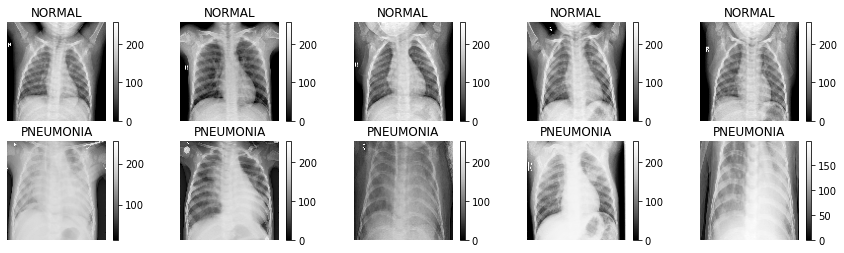

In [37]:
# plotting 3 of each class 
fig = plt.figure(figsize = (15,4))
for i in range(10):
    if i < 5:
        filepath = f'{data_normal_dir}/{select_norm[i-3]}'
        label = 'NORMAL'
    else:
        filepath = f'{data_pneumonia_dir}/{select_pneu[i-8]}'
        label = 'PNEUMONIA'
    ax = fig.add_subplot(2, 5, i+1)
    
    # to plot without rescaling, remove target_size
    filename = image.load_img(filepath, target_size = (100,100), color_mode='grayscale')
    plt.imshow(filename, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
    plt.colorbar()
# # plt.savefig("5normal_5pnuemo.png" ,bbox_inches='tight')    
plt.show()

In [19]:
normal_imgs

['NORMAL-1003233-0001.jpeg',
 'NORMAL-1012843-0001.jpeg',
 'NORMAL-1014768-0001.jpeg',
 'NORMAL-1023731-0001.jpeg',
 'NORMAL-1029510-0001.jpeg',
 'NORMAL-1031320-0001.jpeg',
 'NORMAL-1034239-0001.jpeg',
 'NORMAL-1041364-0001.jpeg',
 'NORMAL-1044645-0001.jpeg',
 'NORMAL-1055663-0001.jpeg',
 'NORMAL-1063934-0001.jpeg',
 'NORMAL-1064313-0001.jpeg',
 'NORMAL-1064313-0002.jpeg',
 'NORMAL-1068231-0001.jpeg',
 'NORMAL-1068326-0001.jpeg',
 'NORMAL-1070073-0001.jpeg',
 'NORMAL-1070073-0002.jpeg',
 'NORMAL-1080088-0001.jpeg',
 'NORMAL-1097039-0001.jpeg',
 'NORMAL-1101909-0001.jpeg',
 'NORMAL-1128157-0001.jpeg',
 'NORMAL-1140710-0001.jpeg',
 'NORMAL-1150393-0001.jpeg',
 'NORMAL-1156778-0001.jpeg',
 'NORMAL-1165014-0001.jpeg',
 'NORMAL-1165014-0002.jpeg',
 'NORMAL-1170804-0001.jpeg',
 'NORMAL-1177627-0001.jpeg',
 'NORMAL-1196989-0001.jpeg',
 'NORMAL-1203236-0001.jpeg',
 'NORMAL-1206638-0001.jpeg',
 'NORMAL-1241506-0001.jpeg',
 'NORMAL-1243491-0001.jpeg',
 'NORMAL-1261648-0001.jpeg',
 'NORMAL-13115

In [20]:
pneumonia_imgs

['BACTERIA-1008087-0001.jpeg',
 'BACTERIA-1025587-0001.jpeg',
 'BACTERIA-1027194-0001.jpeg',
 'BACTERIA-1033441-0001.jpeg',
 'BACTERIA-103798-0001.jpeg',
 'BACTERIA-103798-0002.jpeg',
 'BACTERIA-1039608-0001.jpeg',
 'BACTERIA-1040986-0001.jpeg',
 'BACTERIA-1041881-0001.jpeg',
 'BACTERIA-1041881-0002.jpeg',
 'BACTERIA-104960-0001.jpeg',
 'BACTERIA-1065620-0001.jpeg',
 'BACTERIA-1065620-0002.jpeg',
 'BACTERIA-1069837-0001.jpeg',
 'BACTERIA-1069837-0002.jpeg',
 'BACTERIA-1074715-0001.jpeg',
 'BACTERIA-1076722-0001.jpeg',
 'BACTERIA-1083680-0001.jpeg',
 'BACTERIA-1083680-0002.jpeg',
 'BACTERIA-1083680-0003.jpeg',
 'BACTERIA-1083680-0004.jpeg',
 'BACTERIA-1083680-0005.jpeg',
 'BACTERIA-1083680-0006.jpeg',
 'BACTERIA-1083680-0007.jpeg',
 'BACTERIA-1083680-0008.jpeg',
 'BACTERIA-1083680-0009.jpeg',
 'BACTERIA-1083680-0010.jpeg',
 'BACTERIA-1083680-0011.jpeg',
 'BACTERIA-1083680-0012.jpeg',
 'BACTERIA-1083680-0013.jpeg',
 'BACTERIA-1083680-0014.jpeg',
 'BACTERIA-1083680-0015.jpeg',
 'BACTERIA-

In [30]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + '/' + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
normal_images = img2np(data_normal_dir, normal_imgs)
# pnemonia_images = img2np(f'{train_dir}/PNEUMONIA/', pneumo_imgs)

In [31]:
normal_images

array([[ 92.,  91., 152., ...,   0.,   0.,   0.],
       [146., 149., 199., ...,   0.,   0.,   0.],
       [ 65.,  63., 108., ...,  34.,   0.,   0.],
       ...,
       [104., 107., 105., ...,   0.,   0.,   0.],
       [  0.,   9.,  16., ...,   0.,   0.,   0.],
       [ 11.,  10.,  11., ...,   7.,   5.,  29.]], dtype=float32)

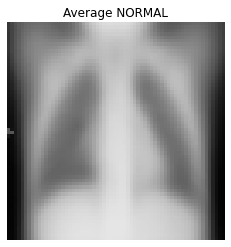

In [34]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0) 
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
#     plt.savefig(f"./../../images/average{title}.png" ,bbox_inches='tight')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'NORMAL')
# pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')

In [23]:
train_normal

'/Users/akams/Documents/Flatiron/Phase_4_project/phase_4_project/CellData/chest_xray/split/train\\normal'

Number of NORMAL PC:  2


ValueError: cannot reshape array of size 192 into shape (192,192)

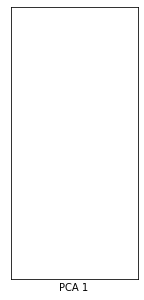

In [33]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.6, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print(f'Number of {title} PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (192, 192)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(5, 5))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.set_xlabel(f"PCA {i+1}")
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()

    
# plot_pca(eigenimages(pneumonia_imgs, 'PNEUMONIA'))
plot_pca(eigenimages(d2_train_dataset, 'NORMAL')) 

In [28]:
nsamples, nx, ny = train_img.shape
d2_train_dataset = train_img.reshape((nsamples,nx*ny))

In [26]:
train_img = image.load_img(r'/Users/akams/Documents/Flatiron/Phase_4_project/phase_4_project/CellData/chest_xray/NORMAL/NORMAL-1003233-0001.jpeg', target_size=(64, 64))
train_img = image.img_to_array(train_img)
train_img

array([[[ 92.,  92.,  92.],
        [ 91.,  91.,  91.],
        [152., 152., 152.],
        ...,
        [122., 122., 122.],
        [129., 129., 129.],
        [163., 163., 163.]],

       [[ 96.,  96.,  96.],
        [ 95.,  95.,  95.],
        [ 90.,  90.,  90.],
        ...,
        [134., 134., 134.],
        [169., 169., 169.],
        [ 99.,  99.,  99.]],

       [[ 90.,  90.,  90.],
        [101., 101., 101.],
        [ 99.,  99.,  99.],
        ...,
        [154., 154., 154.],
        [ 96.,  96.,  96.],
        [104., 104., 104.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [48]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

In [49]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 180) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 200)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=542)

Found 585 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 4101 images belonging to 2 classes.


In [50]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [51]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 542
Number of testing samples: 180
Number of validation samples: 200
train_images shape: (542, 64, 64, 3)
train_labels shape: (542, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (200, 64, 64, 3)
val_labels shape: (200, 2)


In [52]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(542, 12288)
(180, 12288)
(200, 12288)


In [53]:
train_y = np.reshape(train_labels[:,0], (542,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (200,1))

In [54]:
# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
17/17 [==============================] - 1s 22ms/step - loss: 0.6934 - accuracy: 0.6442 - val_loss: 0.6793 - val_accuracy: 0.7300
Epoch 2/50
17/17 [==============================] - 0s 10ms/step - loss: 0.6760 - accuracy: 0.7276 - val_loss: 0.6651 - val_accuracy: 0.7300
Epoch 3/50
17/17 [==============================] - 0s 10ms/step - loss: 0.6607 - accuracy: 0.7377 - val_loss: 0.6529 - val_accuracy: 0.7300
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 0.6522 - accuracy: 0.7205 - val_loss: 0.6425 - val_accuracy: 0.7300
Epoch 5/50
17/17 [==============================] - 0s 9ms/step - loss: 0.6373 - accuracy: 0.7421 - val_loss: 0.6337 - val_accuracy: 0.7300
Epoch 6/50
17/17 [==============================] - 0s 9ms/step - loss: 0.6306 - accuracy: 0.7336 - val_loss: 0.6261 - val_accuracy: 0.7300
Epoch 7/50
17/17 [==============================] - 0s 10ms/step - loss: 0.6223 - accuracy: 0.7358 - val_loss: 0.6197 - val_accuracy: 0.7300
Epoch 8/50
17/17

In [56]:
results_train = model.evaluate(train_img, train_y)

17/17 [==============================] - 0s 4ms/step - loss: 0.5732 - accuracy: 0.7399


In [57]:
results_test = model.evaluate(test_img, test_y)

6/6 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.7056


In [58]:
results_train

[0.5732227563858032, 0.7398523688316345]

In [59]:
results_test

[0.6086954474449158, 0.7055555582046509]

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [61]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
17/17 [==============================] - 4s 191ms/step - loss: 0.6761 - acc: 0.5683 - val_loss: 0.6059 - val_acc: 0.7300
Epoch 2/30
17/17 [==============================] - 3s 162ms/step - loss: 0.5920 - acc: 0.7396 - val_loss: 0.5901 - val_acc: 0.7300
Epoch 3/30
17/17 [==============================] - 3s 175ms/step - loss: 0.5633 - acc: 0.7556 - val_loss: 0.5884 - val_acc: 0.7300
Epoch 4/30
17/17 [==============================] - 4s 216ms/step - loss: 0.5892 - acc: 0.7299 - val_loss: 0.5858 - val_acc: 0.7300
Epoch 5/30
17/17 [==============================] - 3s 195ms/step - loss: 0.5915 - acc: 0.7213 - val_loss: 0.5877 - val_acc: 0.7300
Epoch 6/30
17/17 [==============================] - 3s 191ms/step - loss: 0.6015 - acc: 0.7136 - val_loss: 0.5810 - val_acc: 0.7300
Epoch 7/30
17/17 [==============================] - 3s 196ms/step - loss: 0.5949 - acc: 0.7128 - val_loss: 0.5774 - val_acc: 0.7300
Epoch 8/30
17/17 [==============================] - 3s 191ms/step - loss: 0.

In [62]:
results_train = model.evaluate(train_images, train_y)

17/17 [==============================] - 1s 40ms/step - loss: 0.2588 - acc: 0.9096


In [63]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 39ms/step - loss: 0.2762 - acc: 0.9056


In [64]:
results_train

[0.2587908208370209, 0.9095941185951233]

In [65]:
results_test

[0.27621692419052124, 0.9055555462837219]

In [66]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

In [67]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

Found 585 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 4101 images belonging to 2 classes.


In [68]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [69]:
history_2 = model.fit_generator(train_generator, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator, 
                                validation_steps=25)

/Users/alexandrabruno/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
25/25 [==============================] - 33s 1s/step - loss: 0.6712 - acc: 0.5951 - val_loss: 0.5938 - val_acc: 0.7312
Epoch 2/30
25/25 [==============================] - 31s 1s/step - loss: 0.5497 - acc: 0.7779 - val_loss: 0.5750 - val_acc: 0.7475
Epoch 3/30
25/25 [==============================] - 34s 1s/step - loss: 0.6107 - acc: 0.7083 - val_loss: 0.5941 - val_acc: 0.7250
Epoch 4/30
25/25 [==============================] - 35s 1s/step - loss: 0.5629 - acc: 0.7582 - val_loss: 0.5953 - val_acc: 0.7262
Epoch 5/30
25/25 [==============================] - 42s 2s/step - loss: 0.5592 - acc: 0.7573 - val_loss: 0.5889 - val_acc: 0.7300
Epoch 6/30
25/25 [==============================] - 29s 1s/step - loss: 0.5609 - acc: 0.7560 - val_loss: 0.5816 - val_acc: 0.7337
Epoch 7/30
25/25 [==============================] - 29s 1s/step - loss: 0.5944 - acc: 0.7217 - val_loss: 0.5885 - val_acc: 0.7287
Epoch 8/30
25/25 [==============================] - 29s 1s/step - loss: 0.5600 - acc: 0.75

In [70]:
test_x, test_y = next(test_generator)

In [71]:
results_test = model.evaluate(test_x, test_y)

6/6 [==============================] - 0s 32ms/step - loss: 0.4856 - acc: 0.7722


In [72]:
results_test

[0.48560404777526855, 0.7722222208976746]